In [99]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load Task Image

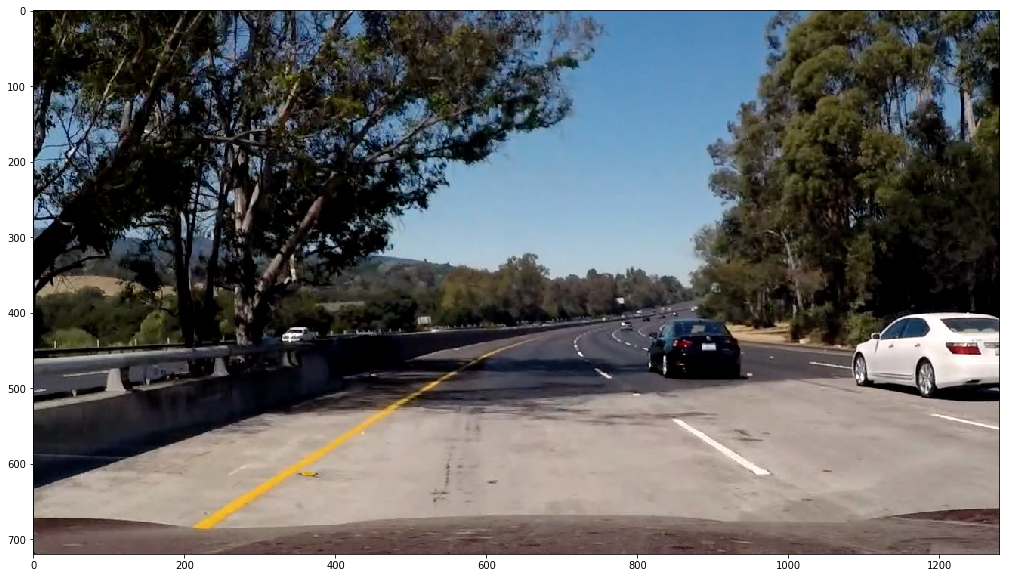

In [100]:
task_image = mpimg.imread('./test5.jpg')
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(task_image)

## Sobel X / Y Threshold

In [101]:
# X or Y sobel gradient
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(200, 255)):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S
    # TODO: Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    
    abs_grad_x = np.absolute(grad_x)
    abs_grad_y = np.absolute(grad_y)
    
    #abbs_sobel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    
    # TODO: Rescale back to 8 bit integer
    if(orient=='x'):
        abs_sobel = np.uint8(255*abs_grad_x/np.max(abs_grad_x))
    if(orient=='y'):
        abs_sobel = np.uint8(255*abs_grad_y/np.max(abs_grad_y))
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise
    ret,abs_sobel_output = cv2.threshold(abs_sobel,200,255,cv2.THRESH_BINARY)
    #abs_sobel_output = np.zeros_like(abs_sobel)
    

    # Return the binary image
    return abs_sobel_output

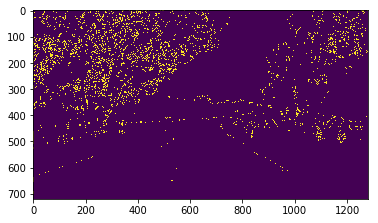

In [122]:
plt.imshow(abs_sobel_thresh(task_image, orient='x', sobel_kernel=3, thresh=(200, 255)))

## Sobel Magnitude Threshold

In [109]:
# Magnitude using X and Y sobel gradient
import math 
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = grayscale(image)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

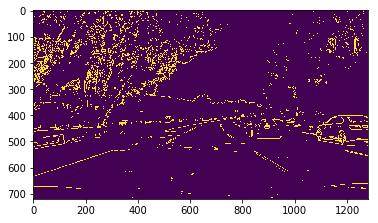

In [114]:
plt.imshow(mag_thresh(task_image, sobel_kernel=3, mag_thresh=(50, 255)))

## Sobel Direction Threshold

In [108]:
# Direction using X and Y sobel gradient
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # TODO: Calculate the gradient direction using np.arctan2 function
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel)
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # TODO: Rescale to 8 bit
    absgraddir = np.uint8(255*absgraddir/np.max(absgraddir))
   
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise    
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1     

    # Return the binary image
    return dir_binary

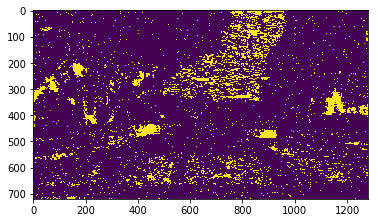

In [117]:
plt.imshow(dir_threshold(task_image, sobel_kernel=3, thresh=(0, np.pi/2)))

## Visualize Sobel Thresholds Results

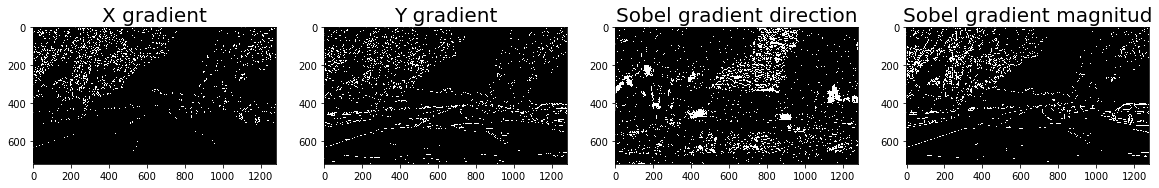

In [118]:
#TODO: Visualize the following:

# X gradient
x_sobel = abs_sobel_thresh(task_image, orient='x', sobel_kernel=3, thresh=(200, 255))
# Y gradient
y_sobel = abs_sobel_thresh(task_image, orient='y', sobel_kernel=3, thresh=(200, 255))
# Sobel gradient direction
dir_sobel = dir_threshold(task_image, sobel_kernel=3, thresh=(0, np.pi/2))
# Sobel gradient magnitude
mag_sobel = mag_thresh(task_image, sobel_kernel=3, mag_thresh=(50, 255))

# visualize results
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
# X gradient
ax1.set_title('X gradient', fontsize=20)
ax1.imshow(x_sobel,cmap='gray')
# Y gradient
ax2.set_title('Y gradient', fontsize=20)
ax2.imshow(y_sobel,cmap='gray')
# Sobel gradient direction
ax3.set_title('Sobel gradient direction', fontsize=20)
ax3.imshow(dir_sobel,cmap='gray')
# Sobel gradient magnitude
ax4.set_title('Sobel gradient magnitud', fontsize=20)
ax4.imshow(mag_sobel,cmap='gray')